All imports and set up "stopwords" replacement.

In [24]:
import csv
import tensorflow as tf
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2.8.0


Set up variables for parameter values later on

In [25]:
vocab_size = 5000
embedding_dim = 64
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

Replace stopwords from training data

In [26]:
articles = []
labels = []

with open("/content/drive/MyDrive/Capstone/csvTrain.csv", 'r', encoding = "ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)

print(len(labels))
print(len(articles))

47845
47845


Split training and validation data 80/20

In [27]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

38276
38276
38276
9569
9569


Tokenize inputs of training data

In [28]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'1': 9,
 '2': 8,
 '<OOV>': 1,
 'and': 3,
 'building': 5,
 'for': 6,
 'garage': 10,
 'new': 2,
 'of': 4,
 'to': 7}

Print out example of tokenized training data

In [29]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[0:10])

[[101, 219, 8, 237, 9, 456, 134, 25, 87, 1950, 101, 219], [72, 16, 110, 46, 89, 28, 27, 1280, 60, 227, 143, 15, 51, 63], [691, 983, 28, 3, 102, 270, 1, 583], [18, 958, 283, 9, 1, 1, 1107, 216, 1409, 102, 270, 20, 9, 1, 1, 203, 213, 42, 1, 194, 1144], [1129, 118, 407, 3748, 1, 9, 127, 433, 928, 418, 43, 233, 2684, 129, 1807, 7, 43, 4, 2685, 1, 11, 849, 36, 30, 59, 343, 104, 93, 146, 189, 1, 1, 7, 107, 4480, 1, 104, 159, 1808, 36, 30, 13, 17, 38, 100, 2685, 138, 434, 100, 210, 105, 2122, 1, 3, 273, 838, 45, 58, 662, 1602, 366, 1, 6, 210, 1, 152, 119, 3, 228, 44, 166, 1888, 705, 752, 291, 189, 1, 100, 104, 407, 8, 672, 3749, 23, 17, 1046, 4, 210, 1602, 1889, 91, 1890, 13, 1, 202, 3, 240, 1, 93, 2574, 2685, 17, 1, 104, 13, 17, 38, 100, 850, 93, 1, 7, 366, 2575, 1, 408, 4, 240, 3, 202, 422, 1851, 2685, 138, 434, 100, 210, 1889, 366, 2575, 282, 91, 1, 17, 202, 422, 672, 2685, 390, 152, 119, 1890, 91, 1, 1108, 199, 91, 408, 4, 17, 202, 422, 672, 2685, 72, 4064, 44, 166, 1, 752, 24, 11, 243, 7

Pad all training input

In [30]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

12
50
14
50
186
50


Printed example of padded training data

In [31]:
print(train_padded[0:5])

[[ 101  219    8  237    9  456  134   25   87 1950  101  219    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  72   16  110   46   89   28   27 1280   60  227  143   15   51   63
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 691  983   28    3  102  270    1  583    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  18  958  283    9    1    1 1107  216 1409  102  270   20    9    1
     1  203  213   42    1  194 1144    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 

Give validation data the same treatment

In [32]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

9569
(9569, 50)


Put all training data/labels into arrays

In [33]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[45])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[45])
print(validation_label_seq.shape)

print(labels)

[1]
[4]
[12]
(38276, 1)
[5]
[12]
[5]
(9569, 1)
['8', '35', '8', '8', 'CODE', '20', '8', '34', '3', '26', '29', '14', 'SIGN', 'SHADE', '8', '35', '7', '35', '20', '20', '25', '40', '31', '24', '2', '2', '38', '9', '22', 'EVENT', '1', '14', '24', '40', '25', '1', '14', '8', '8', '25', '1', '10', '8', '1', '24', '33', '22', '3', '9', '35', '11', '17', '8', '12', '2', '24', '20', '7', '36', '24', 'DISH', '7', '1', '8', '25', '31', '20', '4', '24', '6', '25', '35', '35', '6', '8', 'EVENT', '2', '33', '9', '8', '34', '18', '26', '1', '8', '14', '16', '38', '1', '1', '31', '38', '16', '22', '23', '22', '24', '3', '2', '32', '6', '29', '14', '19', '16', '14', '34', '25', '14', '1', '6', '8', '6', 'EVENT', '14', '8', '8', '6', '14', '1', '25', '12', 'SIGN', '14', '8', 'SIGN', '20', '25', '8', '14', '7', '25', '38', '6', '25', '13', '8', '17', '8', '27', '6', '8', '1', '35', '8', '32', '25', '1', '8', '16', '33', 'SIGN', '8', '8', '35', '35', '32', '14', '22', '14', 'TEMP', '8', '1', '1', '20', 

View example of input data before and after tokenization/padding

In [34]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[25]))
print('---')
print(train_articles[25])

new duplex 2 <OOV> sq ft 1 <OOV> sq ft first floor unit 600 sq ft second floor unit 504 sq ft garage 172 sq ft <OOV> 2 462 sq ft impervious area ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
New Duplex 2,386 Sq Ft, 1,786 Sq Ft First Floor Unit, 600 Sq Ft Second Floor Unit. 504 Sq Ft Garage, 172 Sq Ft Porh. 2,462 Sq Ft Impervious Area.


Create layered model with embedding, globalaveragepooling, and 2 dense layers.

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(53, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 53)                3445      
                                                                 
Total params: 327,605
Trainable params: 327,605
Non-trainable params: 0
_________________________________________________________________


Print all unique outputs in no particular order

In [36]:
print(set(labels))

{'24', '7', '38', '4', '32', '9', '1', '34', 'CODE', '6', 'EVENT', '40', '27', 'INSPECTION', '23', '21', 'TEMP', 'OCCUPANCY', '36', '20', 'AFTERTHEFACT', '35', 'WASHERDRYER', '19', '14', '12', 'DISH', '5', '33', '13', 'SCREENWALL', 'SIDING', 'POLE', '3', '22', '18', 'SIGN', '25', '26', '29', 'SHADE', '11', '16', '8', '10', '31', '17', '2', '28', '15'}


Compile model with sparse categorical crossentropy and adam optimizer

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
1197/1197 - 7s - loss: 2.7708 - accuracy: 0.3007 - val_loss: 1.7620 - val_accuracy: 0.5608 - 7s/epoch - 6ms/step
Epoch 2/10
1197/1197 - 6s - loss: 1.2935 - accuracy: 0.6881 - val_loss: 1.0264 - val_accuracy: 0.7430 - 6s/epoch - 5ms/step
Epoch 3/10
1197/1197 - 6s - loss: 0.8547 - accuracy: 0.7862 - val_loss: 0.8134 - val_accuracy: 0.7944 - 6s/epoch - 5ms/step
Epoch 4/10
1197/1197 - 6s - loss: 0.6615 - accuracy: 0.8297 - val_loss: 0.7015 - val_accuracy: 0.8201 - 6s/epoch - 5ms/step
Epoch 5/10
1197/1197 - 7s - loss: 0.5436 - accuracy: 0.8587 - val_loss: 0.6373 - val_accuracy: 0.8343 - 7s/epoch - 6ms/step
Epoch 6/10
1197/1197 - 6s - loss: 0.4622 - accuracy: 0.8803 - val_loss: 0.6036 - val_accuracy: 0.8463 - 6s/epoch - 5ms/step
Epoch 7/10
1197/1197 - 6s - loss: 0.4033 - accuracy: 0.8943 - val_loss: 0.5787 - val_accuracy: 0.8522 - 6s/epoch - 5ms/step
Epoch 8/10
1197/1197 - 7s - loss: 0.3567 - accuracy: 0.9071 - val_loss: 0.5629 - val_accuracy: 0.8598 - 7s/epoch - 6ms/step
Epoch 9/

Plot out accuracy and loss

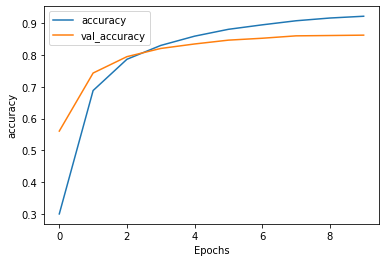

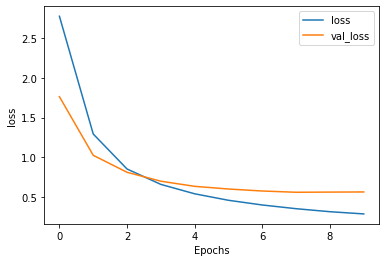

In [38]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Make prediction and print predictions

In [41]:
txt = ["single family home"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding="post", truncating="post")
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
allTypes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
            '11', '12', '13', '14', '15', '16', '17', '18', '19',
            '20', '21', '22', '23', '24', '25', '26', '27', '28',
            '29', '31', '32', '33', '34', '35', '36', '38', '40',
            'AFTERTHEFACT', 'CODE', 'DISH', 'EVENT', 'INSPECTION', 'OCCUPANCY', 'POLE',
            'SCREENWALL', 'SHADE', 'SIDING', 'SIGN', 'TEMP',
            'WASHERDRYER']

print(pred, allTypes[np.argmax(pred)])

[[2.80410972e-11 1.33668482e-02 9.51094091e-01 2.13035241e-06
  7.46975388e-08 7.45465048e-04 2.01340648e-04 1.66826867e-04
  1.10519861e-04 1.18976584e-06 3.72461706e-08 1.45930753e-04
  6.31561782e-03 3.95472534e-06 1.23623698e-08 2.40495792e-05
  3.15571669e-04 6.19427953e-10 1.53775159e-10 6.05412609e-10
  4.06792736e-07 7.57837597e-06 8.60674447e-07 4.89476696e-03
  1.34881657e-06 8.58814531e-08 9.25825134e-06 1.29293767e-06
  7.77150122e-10 8.52305106e-08 3.17499253e-05 2.37353350e-04
  9.19023762e-07 2.82915824e-09 1.86731404e-06 5.97179605e-05
  6.25388420e-05 1.13380008e-06 6.71175428e-07 1.40287879e-10
  6.41516849e-08 1.02331105e-04 6.65642801e-06 2.20452752e-02
  1.12533519e-06 4.63710785e-06 3.56191604e-10 5.27006887e-06
  1.85215613e-05 1.05739909e-05 2.60992209e-07 1.06120642e-11
  1.06689917e-11]] 3
